#### L1 and L2 Regularization

- To deal with issue of ovefitting in ML we can use L1 and L2 regularization.
- accuracy of overfit model can be improved.

    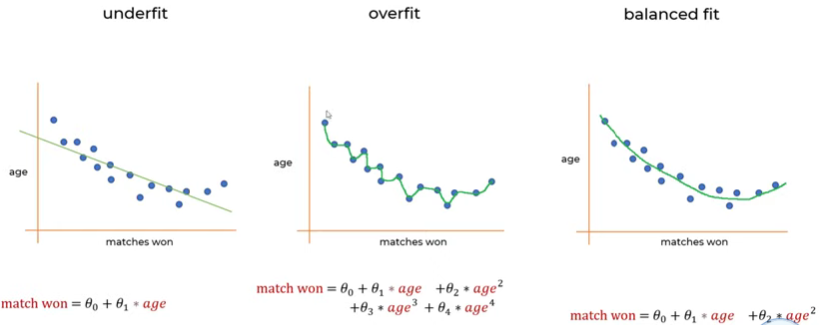
        
**How to reduce Overfitting**
- overfit equation = $\theta_0$ + $\theta_1$ * age + $\theta_2$ * $age^2$ + $\theta_3$ * $age^3$ + $\theta_4$ * $age^4$
- Try to make $\theta_3$ and $\theta_4$ almost close to zero
- new equation = $\theta_0$ + $\theta_1$ * age + $\theta_2$ * $age^2$
- this is a balanced fit equation
- MSE = $\frac{1}{n}\Sigma_{i=1}^n({y}-\hat{y})^2$
- y_predicted = $\hat{y}$ = $h_\theta(x_i)$
- $h_\theta(x_i) = \theta_0 + \theta_1x_1 + \theta_2x_2^2 + \theta_3x_3^3$   ->  (x is age in this case)
- MSE = $\frac{1}{n}\Sigma_{i=1}^n({y}-h_\theta(x_i))^2$
- we want to minimize the MSE
- add $\lambda\Sigma_{i=1}^n\theta i^2$ to equation
- MSE = $\frac{1}{n}\Sigma_{i=1}^n({y}-h_\theta(x_i))^2 + \lambda\Sigma_{i=1}^n\theta_i^2$ 
- $\lambda$ is a free controllabe parameter, its like a tuning knob. And we are making square of each $\theta_i$ parameter.
- if the $\theta$ gets bigger the value of $\lambda\Sigma_{i=1}^n\theta_i^2$ will get bigger, it acts as a penalty, when the $\theta$ gets higher we are adding a penalty. So the $\theta$ don't go too high. Also we can fine tune this with $\lambda$
- **L2 Regularisation** we use $\theta_i^2$
- **L1 Regularisation** we use $|\theta_i|$


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# suppress warning for clean notebook
import warnings
warnings.filterwarnings("ignore")

In [15]:
# read dataset
dataset = pd.read_csv("ML_Algo_Datasets\Melbourne_housing_FULL.csv")
# usefull columns
dataset = dataset[['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG','Regionname', 'Distance','CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Propertycount']]
dataset.head(3)

,Suburb,Rooms,Type,Price,Method,SellerG,Regionname,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,Northern Metropolitan,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,Northern Metropolitan,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,Northern Metropolitan,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,4019.0


In [16]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Regionname           3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Propertycount        3
dtype: int64

In [17]:
# fill na of the following columns with 0
dataset[["Propertycount", "Distance", "Bedroom2", "Bathroom", "Car"]] = dataset[["Propertycount", "Distance", "Bedroom2", "Bathroom", "Car"]].fillna(0)

dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Regionname           3
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Propertycount        0
dtype: int64

In [18]:
# fillna Landsize and BuildingArea with mean
dataset["Landsize"] = dataset["Landsize"].fillna(dataset.Landsize.mean())
dataset["BuildingArea"] = dataset["BuildingArea"].fillna(dataset.BuildingArea.mean())

dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Regionname          3
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Propertycount       0
dtype: int64

In [19]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Regionname       0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Propertycount    0
dtype: int64

In [20]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,160.2564,4019.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0000,4019.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0000,4019.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,850000.0,2.5,3.0,2.0,1.0,94.0,160.2564,4019.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0000,4019.0,False,...,False,False,False,False,False,False,False,False,True,False


In [21]:
X = dataset.drop("Price", axis=1)
Y = dataset["Price"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)

In [24]:
reg.score(X_test,Y_test)

0.1385368316157114

In [25]:
reg.score(X_train, Y_train)

0.6827792395792723

- As you can see the score for test data is very less and score for train data is fairly nice. i.e. the model is very overfitted for training data and not generalized for data not seen.

#### Lasso Regression
- Lasso regression is L1 regularization.

In [26]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [28]:
lasso_reg.score(X_test, Y_test)

0.6636248009953578

In [29]:
lasso_reg.score(X_train, Y_train)

0.6766982470577766

#### Ridge Regression
- Ridge regression is L2 regularization

In [30]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, Y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [31]:
ridge_reg.score(X_test, Y_test)

0.6670848945194959

In [32]:
ridge_reg.score(X_train, Y_train)

0.6622376739684328